<a href="https://colab.research.google.com/github/NarminAsadullayeva/2012-BPI-Challenge/blob/main/Variant1FinancialLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import pareto
import pm4py

In [ ]:
# Uplaod small source files
from google.colab import files
uploaded = files.upload()

Saving Variant1.csv to Variant1 (3).csv


In [ ]:
import pm4py
import numpy as np
import pandas as pd
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
log_csv = pd.read_csv('Variant1.csv', 
                      encoding='cp1252',sep=',')
log_csv = dataframe_utils.convert_timestamp_columns_in_df(log_csv)
def to_eventlog(dataset):
  # Convert log_csv to event_log
  parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: 'case:concept:name'} 
  # identify the case_id_key name (if not change it will simply be the nane of the coloumn)
  
  event_log = log_converter.apply(dataset, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)
  return event_log

In [ ]:
log_csv

,ï»¿Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,lifecycle:transition,concept:name,AMOUNT_REQ
0,173688,A_SUBMITTED-COMPLETE,112.0,38:44.5,Variant 1,1,COMPLETE,A_SUBMITTED,20000
1,173688,A_PARTLYSUBMITTED-COMPLETE,112.0,38:44.9,Variant 1,1,COMPLETE,A_PARTLYSUBMITTED,20000
2,173688,A_PREACCEPTED-COMPLETE,112.0,39:37.9,Variant 1,1,COMPLETE,A_PREACCEPTED,20000
3,173688,W_Completeren aanvraag-SCHEDULE,112.0,39:38.9,Variant 1,1,SCHEDULE,W_Completeren aanvraag,20000
4,173688,W_Completeren aanvraag-START,NaN,36:46.4,Variant 1,1,START,W_Completeren aanvraag,20000
5,173688,A_ACCEPTED-COMPLETE,10862.0,42:43.3,Variant 1,1,COMPLETE,A_ACCEPTED,20000
6,173688,O_SELECTED-COMPLETE,10862.0,45:09.2,Variant 1,1,COMPLETE,O_SELECTED,20000
7,173688,A_FINALIZED-COMPLETE,10862.0,45:09.2,Variant 1,1,COMPLETE,A_FINALIZED,20000
8,173688,O_CREATED-COMPLETE,10862.0,45:11.2,Variant 1,1,COMPLETE,O_CREATED,20000
9,173688,O_SENT-COMPLETE,10862.0,45:11.4,Variant 1,1,COMPLETE,O_SENT,20000


In [ ]:
def to_eventlog(dataset):
  # Convert log_csv to event_log
  parameters = {log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: 'concept:name'} 
  # identify the case_id_key name (if not change it will simply be the nane of the coloumn)
  
  event_log = log_converter.apply(dataset, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)
  return event_log

In [ ]:
event_log = to_eventlog(log_csv)

In [ ]:
import pm4py
k = 6
filtered_log = pm4py.filter_variants_top_k(event_log, k)

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.batches import algorithm 
# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization
# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

In [ ]:
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

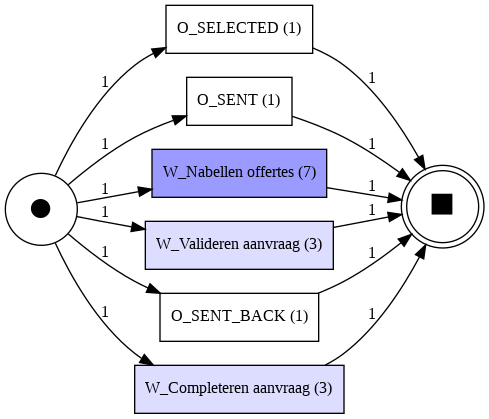

In [ ]:
# Discover a Petri Net using Alpha Miner
net, im, fm = alpha_miner.apply(filtered_log)
# Visualise 
gviz = pn_visualizer.apply(net, im, fm, variant=pn_visualizer.Variants.FREQUENCY, log=filtered_log)
pn_visualizer.view(gviz)

In [ ]:
fitness = replay_fitness_evaluator.apply(filtered_log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness: ', fitness)
prec = precision_evaluator.apply(filtered_log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision: ', prec)

gen = generalization_evaluator.apply(filtered_log, net, im, fm)
print('Generalization: ', gen)

simp = simplicity_evaluator.apply(net)
print('Simplicity: ', simp)

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 50.0, 'average_trace_fitness': 0.7083333333333334, 'log_fitness': 0.5454545454545454, 'percentage_of_fitting_traces': 50.0}


replaying log with TBR, completed variants ::   0%|          | 0/10 [00:00<?, ?it/s]

Precision:  1.0


replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

Generalization:  0.2445558314352535
Simplicity:  0.5


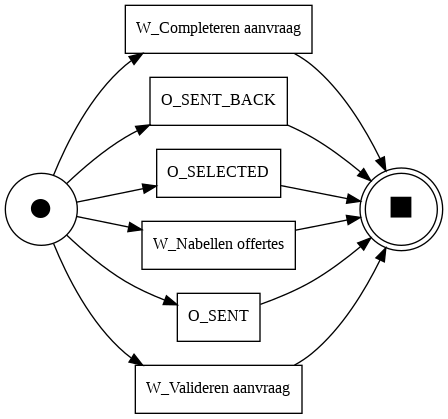

In [ ]:
# Discover a Petri Net using Heuristic Miner
parameters = {heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99, heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT: 10, heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES: 20} 
net, im, fm = heuristics_miner.apply(filtered_log, parameters=parameters)
# Visualise a Petri Net
gviz = pn_visualizer.apply(net, im, fm, log=filtered_log)
pn_visualizer.view(gviz)

In [ ]:
fitness = replay_fitness_evaluator.apply(filtered_log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness: ', fitness)
prec = precision_evaluator.apply(filtered_log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision: ', prec)

gen = generalization_evaluator.apply(filtered_log, net, im, fm)
print('Generalization: ', gen)

simp = simplicity_evaluator.apply(net)
print('Simplicity: ', simp)

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 50.0, 'average_trace_fitness': 0.7083333333333334, 'log_fitness': 0.5454545454545454, 'percentage_of_fitting_traces': 50.0}


replaying log with TBR, completed variants ::   0%|          | 0/10 [00:00<?, ?it/s]

Precision:  1.0


replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

Generalization:  0.2445558314352535
Simplicity:  0.5


replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

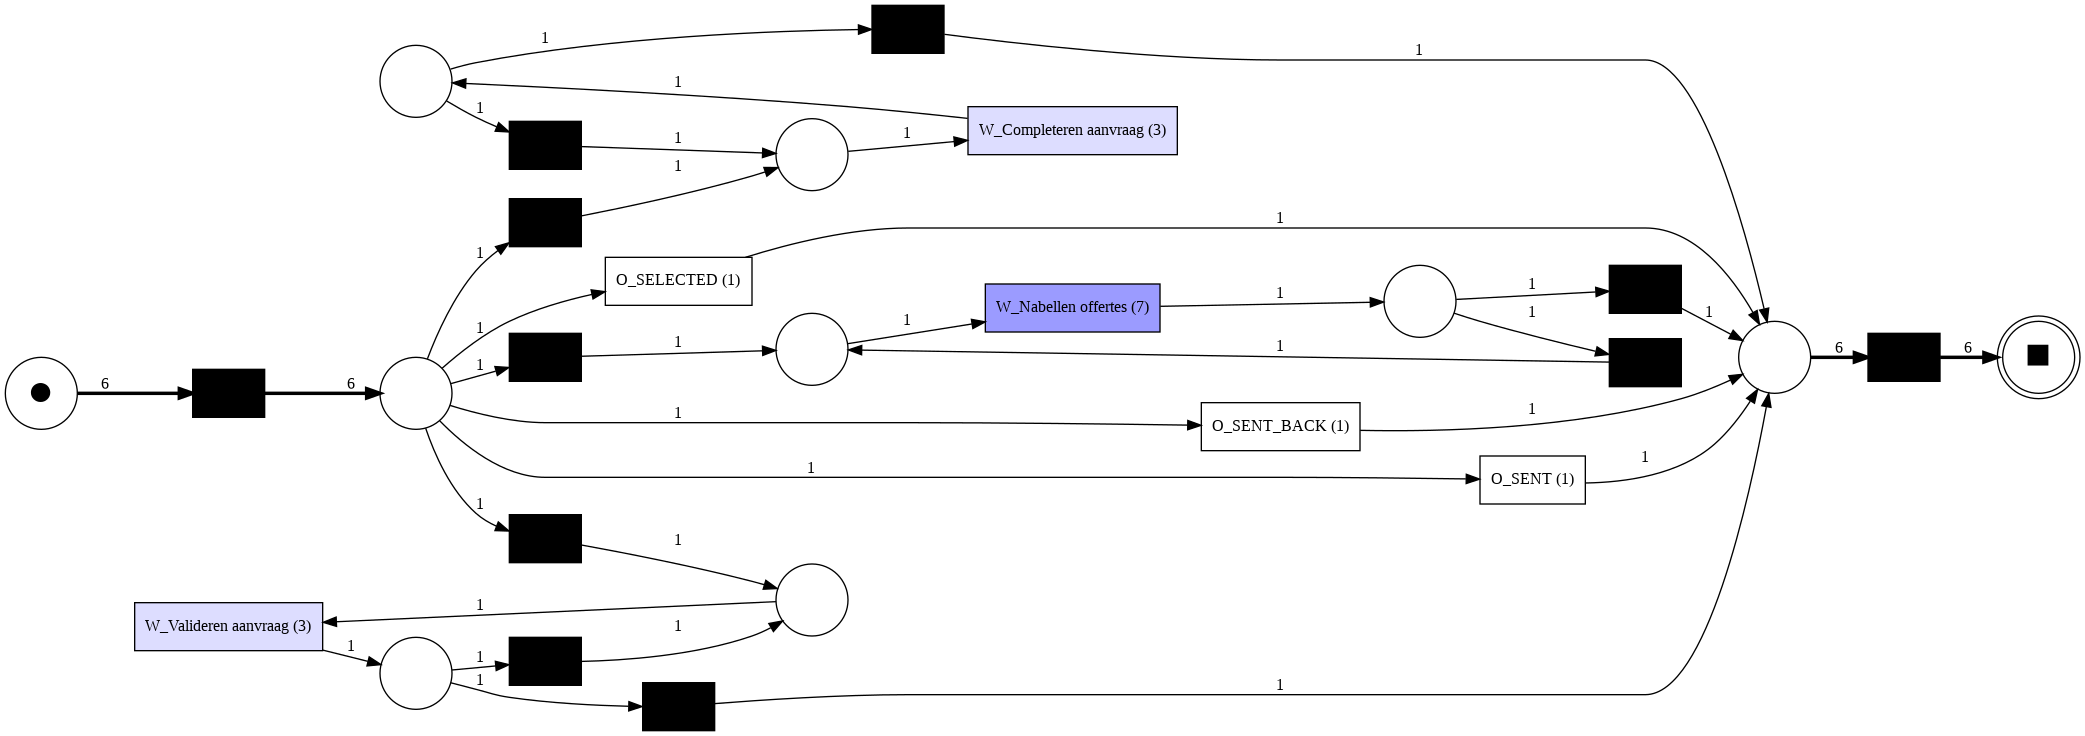

In [ ]:
# Discover process tree using Inductive Miner Infrequent
# Produces a more precise model, without fitness guarantees, by eliminating some behavior.
tree = inductive_miner.apply_tree(filtered_log)
# Convert process tree into a Petri Net
net, im, fm = pt_converter.apply(tree)
## Visualise
gviz = pn_visualizer.apply(net, im, fm, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=filtered_log)
pn_visualizer.view(gviz)

In [ ]:
fitness = replay_fitness_evaluator.apply(filtered_log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness: ', fitness)
prec = precision_evaluator.apply(filtered_log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision: ', prec)

gen = generalization_evaluator.apply(filtered_log, net, im, fm)
print('Generalization: ', gen)

simp = simplicity_evaluator.apply(net)
print('Simplicity: ', simp)

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}


replaying log with TBR, completed variants ::   0%|          | 0/10 [00:00<?, ?it/s]

Precision:  1.0


replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

Generalization:  0.2251986208733433
Simplicity:  0.6585365853658536


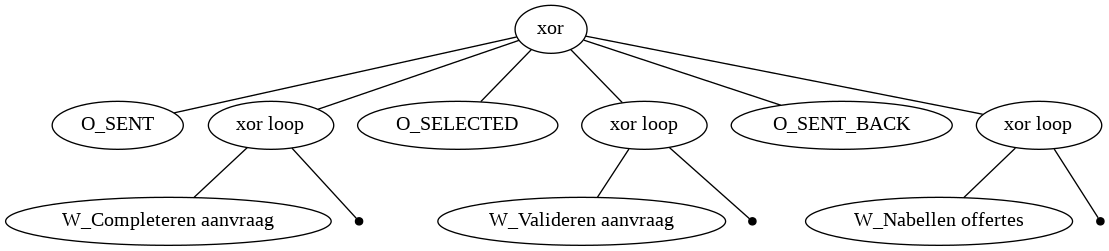

In [ ]:

from pm4py.visualization.process_tree import visualizer as pt_visualizer
gviz = pt_visualizer.apply(tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

In [ ]:
# Conformance Cheking
# Token-based replay matches a trace and a Petri net model,

from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments

# Token-based replay matches a trace and a Petri net model,

replayed_traces = token_replay.apply(event_log, net, im, fm)
replayed_traces
len(replayed_traces)
print("REPLAY")
print("Number of traces", len(replayed_traces))
print(replayed_traces)

#print("Case", event_log[0].attributes['concept:name'])

replaying log with TBR, completed variants ::   0%|          | 0/16 [00:00<?, ?it/s]

REPLAY
Number of traces 16
[{'trace_is_fit': False, 'trace_fitness': 0.0, 'activated_transitions': [], 'reached_marking': ['start:1'], 'enabled_transitions_in_marking': {(O_SELECTED, 'O_SELECTED'), (O_SENT_BACK, 'O_SENT_BACK'), (W_Completeren aanvraag, 'W_Completeren aanvraag'), (O_SENT, 'O_SENT'), (W_Nabellen offertes, 'W_Nabellen offertes'), (W_Valideren aanvraag, 'W_Valideren aanvraag')}, 'transitions_with_problems': [], 'missing_tokens': 1, 'consumed_tokens': 1, 'remaining_tokens': 1, 'produced_tokens': 1}, {'trace_is_fit': False, 'trace_fitness': 0.0, 'activated_transitions': [], 'reached_marking': ['start:1'], 'enabled_transitions_in_marking': {(O_SELECTED, 'O_SELECTED'), (O_SENT_BACK, 'O_SENT_BACK'), (W_Completeren aanvraag, 'W_Completeren aanvraag'), (O_SENT, 'O_SENT'), (W_Nabellen offertes, 'W_Nabellen offertes'), (W_Valideren aanvraag, 'W_Valideren aanvraag')}, 'transitions_with_problems': [], 'missing_tokens': 1, 'consumed_tokens': 1, 'remaining_tokens': 1, 'produced_tokens'

In [ ]:
anomalous_traces = []
i = 0
while i < len(replayed_traces):
	if replayed_traces[i]["trace_fitness"] < 1:
		anomalous_traces.append(event_log[i].attributes["concept:name"])
	i += 1
# print the list as a string
print(', '.join(map(str, anomalous_traces)))
print("Number of anomalous traces ", len(anomalous_traces))

print("Percentage of anomalous traces", (len(anomalous_traces)/len(replayed_traces))*100 , '%')

A_SUBMITTED, A_PARTLYSUBMITTED, A_PREACCEPTED, W_Completeren aanvraag, A_ACCEPTED, A_FINALIZED, O_CREATED, W_Nabellen offertes, W_Valideren aanvraag, A_REGISTERED, A_APPROVED, O_ACCEPTED, A_ACTIVATED
Number of anomalous traces  13
Percentage of anomalous traces 81.25 %


In [ ]:
# Conformance Cheking
# Token-based replay matches a trace and a Petri net model,

from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments

# Token-based replay matches a trace and a Petri net model,

replayed_traces = token_replay.apply(filtered_log, net, im, fm)
replayed_traces
len(replayed_traces)
print("REPLAY")
print("Number of traces", len(replayed_traces))
print(replayed_traces)

#print("Case", event_log[0].attributes['concept:name'])

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

REPLAY
Number of traces 6
[{'trace_is_fit': False, 'trace_fitness': 0.5, 'activated_transitions': [(W_Completeren aanvraag, 'W_Completeren aanvraag'), (W_Completeren aanvraag, 'W_Completeren aanvraag'), (W_Completeren aanvraag, 'W_Completeren aanvraag')], 'reached_marking': ['end:3'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [(W_Completeren aanvraag, 'W_Completeren aanvraag'), (W_Completeren aanvraag, 'W_Completeren aanvraag')], 'missing_tokens': 2, 'consumed_tokens': 4, 'remaining_tokens': 2, 'produced_tokens': 4}, {'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [(O_SELECTED, 'O_SELECTED')], 'reached_marking': ['end:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 2, 'remaining_tokens': 0, 'produced_tokens': 2}, {'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [(O_SENT, 'O_SENT')], 'reached_marking': ['end:1'], 'enabled_transitions_in_marking': 

In [ ]:
anomalous_traces = []
i = 0
while i < len(replayed_traces):
	if replayed_traces[i]["trace_fitness"] < 1:
		anomalous_traces.append(filtered_log[i].attributes["concept:name"])
	i += 1
# print the list as a string
print(', '.join(map(str, anomalous_traces)))
print("Number of anomalous traces ", len(anomalous_traces))

print("Percentage of anomalous traces", (len(anomalous_traces)/len(replayed_traces))*100 , '%')

W_Completeren aanvraag, W_Nabellen offertes, W_Valideren aanvraag
Number of anomalous traces  3
Percentage of anomalous traces 50.0 %


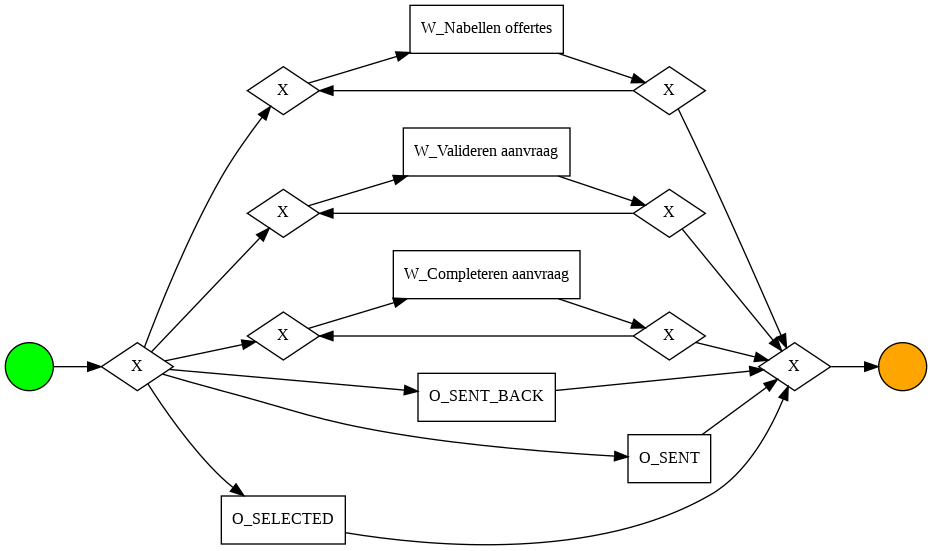

In [ ]:
import pm4py
tree = pm4py.discover_process_tree_inductive(filtered_log)
bpmn_graph = pm4py.convert_to_bpmn(tree)
pm4py.view_bpmn(bpmn_graph)